In [1]:
import numpy as np
import qutip as qu
from error_estimation import single_generate_mse
from functools import partial

In [2]:
# dimension = 2
# epsilon = 0.0001
n_matrices = 1000
max_dimension =6

epsilons = [1E-2/10**i for i in range(7)]
dimensions = np.arange(2, max_dimension+1)


In [3]:
epsilons
dimensions

array([2, 3, 4, 5, 6])

In [4]:
# rhos = [[qu.rand_dm(d)[:] for _ in range(n_matrices)]for d in dimensions]

In [5]:
solutions_diff_dimensions = []
for dimension in dimensions:
    solutions_per_eps_same_dim=[]
    for epsilon in epsilons:
        print(f"Dim: {dimension}, Eps: {epsilon}")
        partial_mse = partial(
            single_generate_mse, epsilon=epsilon, dimension=dimension
        )
        rhos = [qu.rand_dm(dimension)[:] for _ in range(n_matrices)]
        mse_list_over_rhos = qu.parallel.parfor(partial_mse, rhos)
        solutions_per_eps_same_dim.append(mse_list_over_rhos)
    solutions_diff_dimensions.append(solutions_per_eps_same_dim)


Dim: 2, Eps: 0.01
Dim: 2, Eps: 0.001
Dim: 2, Eps: 0.0001
Dim: 2, Eps: 1e-05
Dim: 2, Eps: 1e-06
Dim: 2, Eps: 1e-07
Dim: 2, Eps: 1e-08
Dim: 3, Eps: 0.01
Dim: 3, Eps: 0.001
Dim: 3, Eps: 0.0001
Dim: 3, Eps: 1e-05
Dim: 3, Eps: 1e-06
Dim: 3, Eps: 1e-07
Dim: 3, Eps: 1e-08
Dim: 4, Eps: 0.01
Dim: 4, Eps: 0.001
Dim: 4, Eps: 0.0001
Dim: 4, Eps: 1e-05
Dim: 4, Eps: 1e-06
Dim: 4, Eps: 1e-07
Dim: 4, Eps: 1e-08
Dim: 5, Eps: 0.01
Dim: 5, Eps: 0.001
Dim: 5, Eps: 0.0001
Dim: 5, Eps: 1e-05
Dim: 5, Eps: 1e-06
Dim: 5, Eps: 1e-07
Dim: 5, Eps: 1e-08
Dim: 6, Eps: 0.01
Dim: 6, Eps: 0.001
Dim: 6, Eps: 0.0001
Dim: 6, Eps: 1e-05
Dim: 6, Eps: 1e-06
Dim: 6, Eps: 1e-07
Dim: 6, Eps: 1e-08


In [7]:
import joblib

joblib.dump(solutions_diff_dimensions, "results_aggregated_mse.job")

['results_aggregated_mse.job']

In [7]:
len(solutions_diff_dimensions)


5

## Dimension 2

(5, 35, 1000)

(5, 7, 1000)

In [59]:
np.array(solutions_diff_dimensions).shape

(5, 7, 1000)

In [60]:
mse_list = solutions_diff_dimensions[0]


In [61]:
np.array(mse_list).shape

(7, 1000)

In [8]:
all_data_array = np.array(solutions_diff_dimensions)

In [9]:
mus = np.mean(all_data_array, axis=2)
stds = np.std(all_data_array, axis=2)

In [10]:
mus.shape

(5, 7)

In [11]:
import matplotlib.pyplot as plt

[]

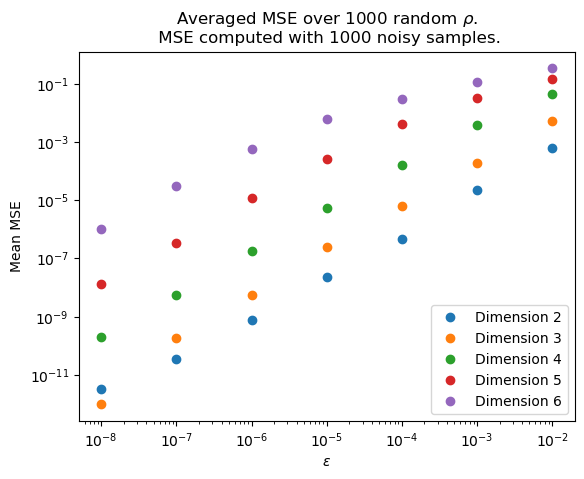

In [19]:
for i in range(mus.shape[0]):
    dimension = dimensions[i]
    # plt.errorbar(epsilons, mus[i, :],yerr=stds[i, :] , marker = 'o',   label=f'Dimension {dimension}')
    plt.plot(epsilons, mus[i, :], 'o', label=f'Dimension {dimension}')

plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$\epsilon$')
plt.ylabel(f'Mean MSE')
plt.title('Averaged MSE over 1000 random '+r'$\rho$' +".\n MSE computed with 1000 noisy samples.")
plt.plot()